# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pytz

# Data processing

In [2]:
#import CoSSMic data
red_df = pd.read_csv("household_data_60min_singleindex.csv", parse_dates=["utc_timestamp","cet_cest_timestamp"])

In [3]:
#list of columns that will be plotted
list_pv = ["DE_KN_residential1_pv","DE_KN_residential3_pv","DE_KN_residential4_pv","DE_KN_residential6_pv"]
list_import = ["DE_KN_residential1_grid_import","DE_KN_residential2_grid_import","DE_KN_residential3_grid_import","DE_KN_residential4_grid_import","DE_KN_residential5_grid_import","DE_KN_residential6_grid_import"]
list_export = ["DE_KN_residential3_grid_export","DE_KN_residential4_grid_export","DE_KN_residential6_grid_export"]
#devices including EV
list_devices = ["DE_KN_residential1_dishwasher","DE_KN_residential1_freezer","DE_KN_residential1_heat_pump","DE_KN_residential1_washing_machine","DE_KN_residential2_circulation_pump","DE_KN_residential2_dishwasher","DE_KN_residential2_freezer","DE_KN_residential2_washing_machine","DE_KN_residential3_dishwasher","DE_KN_residential3_freezer","DE_KN_residential3_circulation_pump","DE_KN_residential3_refrigerator","DE_KN_residential3_washing_machine","DE_KN_residential4_dishwasher","DE_KN_residential4_freezer","DE_KN_residential4_heat_pump","DE_KN_residential4_refrigerator","DE_KN_residential4_washing_machine","DE_KN_residential4_ev","DE_KN_residential5_refrigerator","DE_KN_residential5_washing_machine","DE_KN_residential5_dishwasher","DE_KN_residential6_dishwasher","DE_KN_residential6_freezer","DE_KN_residential6_circulation_pump","DE_KN_residential6_washing_machine"]

#list with all data columns
list_ges = list_export+list_import+list_pv+list_devices

#labels
labels_pv = ["PV 1","PV 3","PV 4","PV 6"]
labels_import = ["Import 1","Import 2","Import 3","Import 4","Import 5","Import 6","consumption 3"]
labels_export = ["Export 3","Export 4","Export 6"]
#labels_devices = 

In [4]:
#add hour column for mean of hour of the day
red_df["hour"]=red_df["utc_timestamp"].apply(lambda x: x.hour)

In [5]:
#add day_of_week column
red_df["day_of_week"]= red_df["utc_timestamp"].apply(lambda x: x.weekday)

In [6]:
#set utc timestamp as index
red_df.set_index("utc_timestamp", inplace = True)

In [7]:
#Time period of used data:
sdate = dt.date(2016, 3, 1)   # start date
edate = dt.date(2017, 2, 28)   # end date

In [8]:
#reduce data frame to the used time period
red_df = red_df.loc[str(sdate):str(edate)].copy()

In [9]:
#count interpolated values
red_df.interpolated.str.contains("residential_grid_import").value_counts()

False    8485
Name: interpolated, dtype: int64

In [10]:
#Transforming the data so that the difference and not the total amount of energy is the hourly value
for x in list_ges:
   red_df[x] = red_df[x].diff()

In [11]:
#adding column with total consumption: import +(PV - export)
hh_lst_1 = ["DE_KN_residential1_pv","DE_KN_residential1_grid_import"]
hh_lst_3 = ["DE_KN_residential3_pv","DE_KN_residential3_grid_import","DE_KN_residential3_grid_export"]
hh_lst_4 = ["DE_KN_residential4_pv","DE_KN_residential4_grid_import","DE_KN_residential4_grid_export"]
hh_lst_6 = ["DE_KN_residential6_pv","DE_KN_residential6_grid_import","DE_KN_residential6_grid_export"]

#consumption wit pv + import - export - devices (should be 0 if all devices are displayed)
red_df["consumption_1_ap"] = red_df.DE_KN_residential1_grid_import - red_df.DE_KN_residential1_dishwasher - red_df.DE_KN_residential1_freezer - red_df.DE_KN_residential1_heat_pump - red_df.DE_KN_residential1_washing_machine
red_df["consumption_2_ap"] = red_df.DE_KN_residential2_grid_import - red_df.DE_KN_residential2_dishwasher - red_df.DE_KN_residential2_freezer - red_df.DE_KN_residential2_circulation_pump - red_df.DE_KN_residential2_washing_machine
red_df["consumption_3_ap"] = red_df.DE_KN_residential3_pv + red_df.DE_KN_residential3_grid_import - red_df.DE_KN_residential3_grid_export - red_df.DE_KN_residential3_dishwasher - red_df.DE_KN_residential3_freezer - red_df.DE_KN_residential3_circulation_pump - red_df.DE_KN_residential3_refrigerator - red_df.DE_KN_residential3_washing_machine
red_df["consumption_4_ap"] = red_df.DE_KN_residential4_pv + red_df.DE_KN_residential4_grid_import - red_df.DE_KN_residential4_grid_export - red_df.DE_KN_residential4_dishwasher - red_df.DE_KN_residential4_freezer - red_df.DE_KN_residential4_heat_pump - red_df.DE_KN_residential4_refrigerator - red_df.DE_KN_residential4_washing_machine - red_df.DE_KN_residential4_ev
red_df["consumption_5_ap"] = red_df.DE_KN_residential5_grid_import - red_df.DE_KN_residential5_dishwasher - red_df.DE_KN_residential5_washing_machine - red_df.DE_KN_residential5_refrigerator
red_df["consumption_6_ap"] = red_df.DE_KN_residential6_grid_import - red_df.DE_KN_residential6_dishwasher - red_df.DE_KN_residential6_freezer - red_df.DE_KN_residential6_circulation_pump - red_df.DE_KN_residential6_washing_machine
#consumption 6 with PV excluded:


#consumption only with pv/imp/exp for res 1 pv is excluded because it is assumed that the PV is exported
red_df["consumption_3"] = red_df.DE_KN_residential3_grid_import + (red_df.DE_KN_residential3_pv - red_df.DE_KN_residential3_grid_export)
red_df["consumption_4"] = red_df.DE_KN_residential4_grid_import + (red_df.DE_KN_residential4_pv - red_df.DE_KN_residential4_grid_export)
red_df["consumption_6"] = red_df.DE_KN_residential6_grid_import + (red_df.DE_KN_residential6_pv - red_df.DE_KN_residential6_grid_export)
#consumption 6 with PV and export excluded:
#red_df["consumption_6"] = red_df.DE_KN_residential6_grid_import


list_cons = ["DE_KN_residential1_grid_import","DE_KN_residential2_grid_import","consumption_3","consumption_4","DE_KN_residential5_grid_import","DE_KN_residential6_grid_import"]
list_cons_ap = ["consumption_1_ap","consumption_2_ap","consumption_3_ap","consumption_4_ap","consumption_5_ap","consumption_6_ap"]

In [12]:
#list of columns that are normalized
list_norm = list_ges + list_cons + list_cons_ap

In [13]:
#norm values for 3 indicated many 0 values therefore this values have been set to nan
red_df.loc[red_df["DE_KN_residential3_grid_import"]==0, "DE_KN_residential3_grid_import"] = np.nan

In [14]:
#normalization
for x in list_norm:
    max_energy = red_df[x].max()
    min_energy = red_df[x].min()
    red_df[x + "_norm"] = (red_df[x] - abs(min_energy))/(max_energy-abs(min_energy))

In [15]:
#consumption normalized, calculation after normalization
red_df["consumption_3_norm"] = red_df.DE_KN_residential3_grid_import_norm + (red_df.DE_KN_residential3_pv_norm - red_df.DE_KN_residential3_grid_export_norm)
red_df["consumption_4_norm"] = red_df.DE_KN_residential4_grid_import_norm + (red_df.DE_KN_residential4_pv_norm - red_df.DE_KN_residential4_grid_export_norm)
red_df["consumption_6_norm"] = red_df.DE_KN_residential6_grid_import_norm + (red_df.DE_KN_residential6_pv_norm - red_df.DE_KN_residential6_grid_export_norm)

In [16]:
#normalized with ap_normpliances
red_df["consumption_1_ap_norm"] = red_df.DE_KN_residential1_grid_import_norm - red_df.DE_KN_residential1_dishwasher_norm - red_df.DE_KN_residential1_freezer_norm - red_df.DE_KN_residential1_heat_pump_norm - red_df.DE_KN_residential1_washing_machine_norm
red_df["consumption_2_ap_norm"] = red_df.DE_KN_residential2_grid_import_norm - red_df.DE_KN_residential2_dishwasher_norm - red_df.DE_KN_residential2_freezer_norm - red_df.DE_KN_residential2_circulation_pump_norm - red_df.DE_KN_residential2_washing_machine_norm
red_df["consumption_3_ap_norm"] = red_df.DE_KN_residential3_pv_norm + red_df.DE_KN_residential3_grid_import_norm - red_df.DE_KN_residential3_grid_export_norm - red_df.DE_KN_residential3_dishwasher_norm - red_df.DE_KN_residential3_freezer_norm - red_df.DE_KN_residential3_circulation_pump_norm - red_df.DE_KN_residential3_refrigerator_norm - red_df.DE_KN_residential3_washing_machine_norm
red_df["consumption_4_ap_norm"] = red_df.DE_KN_residential4_pv_norm + red_df.DE_KN_residential4_grid_import_norm - red_df.DE_KN_residential4_grid_export_norm - red_df.DE_KN_residential4_dishwasher_norm - red_df.DE_KN_residential4_freezer_norm - red_df.DE_KN_residential4_heat_pump_norm - red_df.DE_KN_residential4_refrigerator_norm
red_df["consumption_5_ap_norm"] = red_df.DE_KN_residential5_grid_import_norm - red_df.DE_KN_residential5_dishwasher_norm - red_df.DE_KN_residential5_washing_machine_norm - red_df.DE_KN_residential5_refrigerator_norm
red_df["consumption_6_ap_norm"] = red_df.DE_KN_residential6_grid_import_norm - red_df.DE_KN_residential6_dishwasher_norm - red_df.DE_KN_residential6_freezer_norm - red_df.DE_KN_residential6_circulation_pump_norm - red_df.DE_KN_residential6_washing_machine_norm

In [17]:
#export dataframe for linking of the data sets
red_df.to_pickle("df_cossmic.pkl")

In [18]:
#normalized list of columns that will be plotted
list_pv_norm = ["DE_KN_residential1_pv_norm","DE_KN_residential3_pv_norm","DE_KN_residential4_pv_norm","DE_KN_residential6_pv_norm"]
list_import_norm = ["DE_KN_residential1_grid_import_norm","DE_KN_residential2_grid_import_norm","DE_KN_residential3_grid_import_norm","DE_KN_residential4_grid_import_norm","DE_KN_residential5_grid_import_norm","DE_KN_residential6_grid_import_norm"]
list_export_norm = ["DE_KN_residential3_grid_export_norm","DE_KN_residential4_grid_export_norm","DE_KN_residential6_grid_export_norm"]
list_cons_norm = ["DE_KN_residential1_grid_import_norm","DE_KN_residential2_grid_import_norm","consumption_3_norm","consumption_4_norm","DE_KN_residential5_grid_import_norm","DE_KN_residential6_grid_import_norm"]
list_cons_ap_norm = ["consumption_1_ap_norm","consumption_2_ap_norm","consumption_3_ap_norm","consumption_4_ap_norm","consumption_5_ap_norm","consumption_6_ap_norm"]
list_ges_norm = list_export_norm + list_import_norm + list_pv_norm

#labels
labels_pv_norm = ["PV 1","PV 3","PV 4","PV 6"]
labels_import_norm = ["Import 1","Import 2","Import 3","Import 4","Import 5","Import 6"]
labels_export_norm = ["Export 3","Export 4","Export 6"]
labels_cons_norm = ["3","4","6"]
labels_cons = ["Consumption 1","Consumption 2","Consumption 3","Consumption 4","Consumption 5","Consumption 6"]

In [19]:
#print start and end period of trials for overview
#for x in list_ges: 
#    print(str(x) + " from " + str(red_df[x].dropna().index.min()) + " to " + str(red_df[x].dropna().index.max())) 

In [20]:
#Meteorological seasons (not perfectly suitable for resident 2, data ending from feb 2017): 
#spring
sdate_sp = dt.date(2016, 3, 1)   # start date
edate_sp = dt.date(2016, 5, 31)   # end date
#summer
sdate_su = dt.date(2016, 6, 1)   # start date
edate_su = dt.date(2016, 8, 31)   # end date
#Fall
sdate_fa = dt.date(2016, 9, 1)   # start date
edate_fa = dt.date(2016, 11, 30)   # end date
#winter
sdate_wi = dt.date(2016, 12, 1)   # start date
edate_wi = dt.date(2017, 2, 28)   # end date

In [21]:
df_fa = red_df[str(sdate_fa):str(edate_fa)]
df_wi = red_df[str(sdate_wi):str(edate_wi)]
df_sp = red_df[str(sdate_sp):str(edate_sp)]
df_su = red_df[str(sdate_su):str(edate_su)]

In [22]:
#list for week/wknd slicing
week = [0,1,2,3,4]
wknd = [5,6]

In [23]:
#week/wknd slicing
df_fa_week = df_fa[df_fa.day_of_week.isin(week)]
df_wi_week = df_wi[df_wi.day_of_week.isin(week)]
df_sp_week = df_sp[df_sp.day_of_week.isin(week)]
df_su_week = df_su[df_su.day_of_week.isin(week)]

df_fa_wknd = df_fa[df_fa.day_of_week.isin(wknd)]
df_wi_wknd = df_wi[df_wi.day_of_week.isin(wknd)]
df_sp_wknd = df_sp[df_sp.day_of_week.isin(wknd)]
df_su_wknd = df_su[df_su.day_of_week.isin(wknd)]

In [24]:
#List of time period data frams for for-loop:

#time_period_list= ["df_sp_week","df_sp_wknd","df_su_week","df_su_wknd","df_fa_week","df_fa_wknd","df_wi_wknd","df_wi_week"]

#without strings in list:
time_period_list= [df_sp_week,df_sp_wknd,df_su_week,df_su_wknd,df_fa_week,df_fa_wknd,df_wi_week,df_wi_wknd]

In [25]:
#function to plot mean for every hour of the day
def plot_mean(df,liste,label,string):
    for x in liste:
        plt.plot(df[x].groupby(df.index.hour).mean())  
    plt.legend(label)
    plt.ylabel(string)
    plt.xlabel("Hour of the day")
    
#Color list and code for alligning the colors:
#color_list = ["C2","C3","C5"]
#plt.plot(df[x].groupby(df.index.hour).mean(),c=color_list[liste.index(x)])  

In [26]:
#norm values for 3 indicated many 0 values therefore this values have been set to nan
red_df.loc[red_df["DE_KN_residential3_grid_import_norm"]==0, "DE_KN_residential3_grid_import_norm"] = np.nan

# Whole year plots

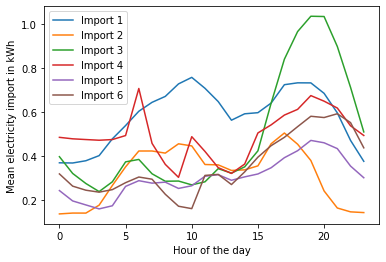

In [27]:
plot_mean(red_df,list_import,labels_import,"Mean electricity import in kWh")

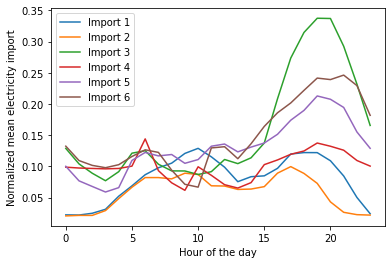

In [28]:
plot_mean(red_df,list_import_norm,labels_import,"Normalized mean electricity import")

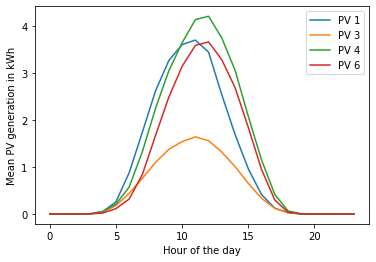

In [29]:
plot_mean(red_df,list_pv,labels_pv,"Mean PV generation in kWh")

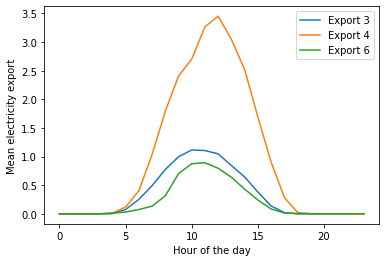

In [30]:
plot_mean(red_df,list_export,labels_export,"Mean electricity export")

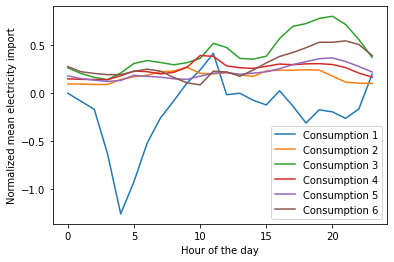

In [31]:
plot_mean(red_df,list_cons_ap,labels_cons,"Normalized mean electricity import")

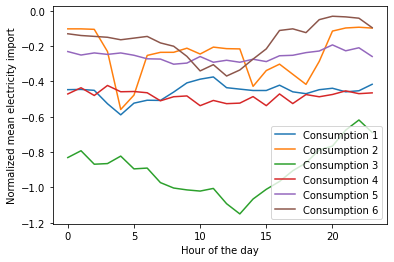

In [32]:
plot_mean(red_df,list_cons_ap_norm,labels_cons,"Normalized mean electricity import")

# Consumption with pv/imp/exp only 

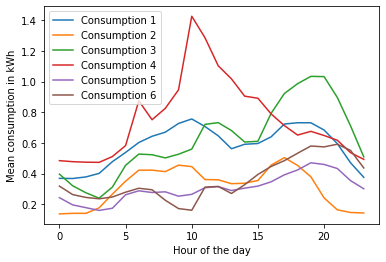

In [33]:
plot_mean(red_df,list_cons,labels_cons,"Mean consumption in kWh")

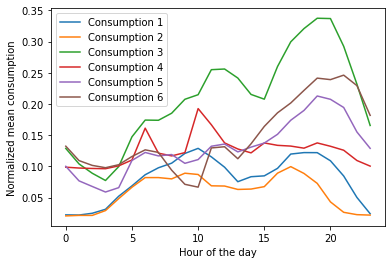

In [34]:
plot_mean(red_df,list_cons_norm,labels_cons,"Normalized mean consumption")

# Plots with seasons (maybe not enougth data?) 

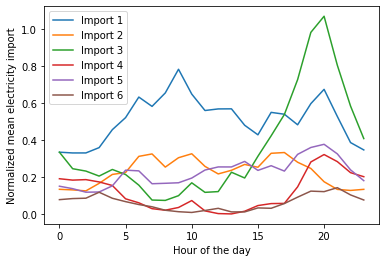

In [35]:
plot_mean(df_su_week,list_import,labels_import,"Normalized mean electricity import")

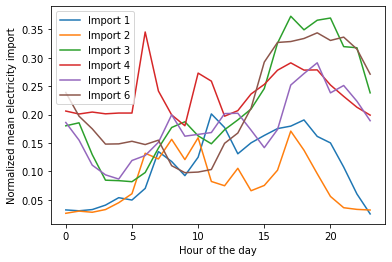

In [36]:
plot_mean(df_wi_wknd,list_import_norm,labels_import,"Normalized mean electricity import")

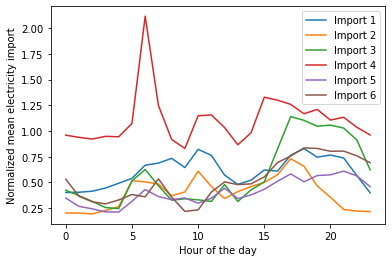

In [37]:
plot_mean(df_wi_week,list_import,labels_import,"Normalized mean electricity import")

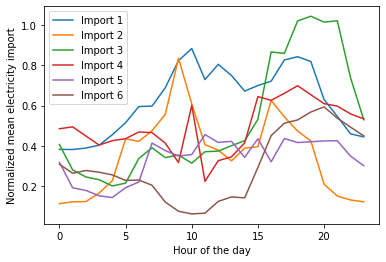

In [38]:
plot_mean(df_fa_wknd,list_import,labels_import,"Normalized mean electricity import")

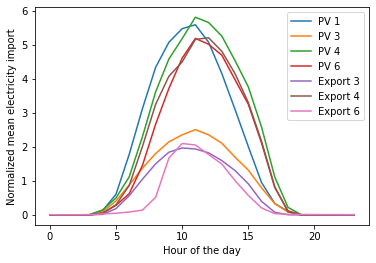

In [39]:
plot_mean(df_su_week,list_pv + list_export,labels_pv + labels_export,"Normalized mean electricity import")

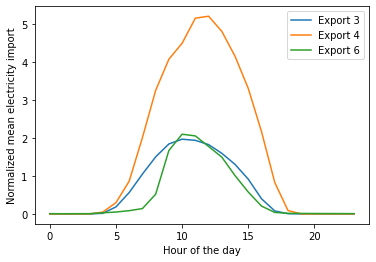

In [40]:
plot_mean(df_su_week,list_export,labels_export,"Normalized mean electricity import")

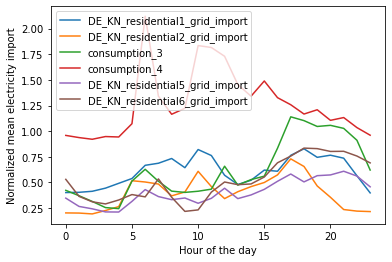

In [41]:
plot_mean(df_wi_week,list_cons,list_cons,"Normalized mean electricity import")

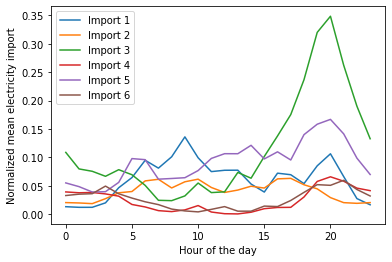

In [42]:
plot_mean(df_su_week,list_import_norm,labels_import_norm,"Normalized mean electricity import")

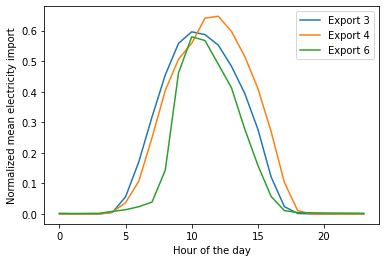

In [43]:
plot_mean(df_su_week,list_export_norm,labels_export_norm,"Normalized mean electricity import")

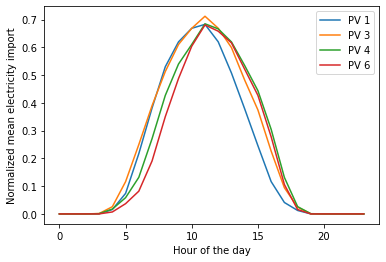

In [44]:
plot_mean(df_su_week,list_pv_norm,labels_pv_norm,"Normalized mean electricity import")

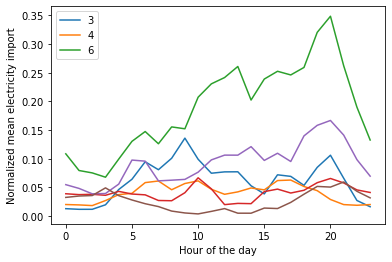

In [45]:
plot_mean(df_su_week,list_cons_norm,labels_cons_norm,"Normalized mean electricity import")

# Mean electricity consumption of the residents

In [46]:
red_df.DE_KN_residential1_grid_import.mean()

0.5825722114396622

In [47]:
red_df.DE_KN_residential3_grid_import.mean()

0.5175454665959703

In [48]:
red_df.DE_KN_residential4_grid_import.mean()

0.493562963808654

In [49]:
red_df.DE_KN_residential5_grid_import.mean()

0.30339285306541847

In [50]:
red_df.DE_KN_residential6_grid_import.mean()

0.35641682840506916

In [51]:
red_df.consumption_4.mean() - red_df.DE_KN_residential4_heat_pump.mean() -red_df.DE_KN_residential4_ev.mean()

0.3059386916314648

In [52]:
red_df.consumption_3.mean()

0.6195159264756243

In [53]:
red_df.DE_KN_residential1_grid_import.mean()

0.5825722114396622

In [54]:
red_df.DE_KN_residential1_pv.mean()

1.0550416714236786

In [55]:
red_df.DE_KN_residential1_heat_pump.mean()

0.6956558967918713

In [56]:
(red_df.DE_KN_residential4_heat_pump.mean() + red_df.DE_KN_residential4_ev.mean())/red_df.consumption_4.mean()

0.5955293118261002

In [57]:
(red_df.DE_KN_residential1_grid_import.mean() + red_df.DE_KN_residential1_pv.mean())

1.6376138828633406

In [58]:
imp_pv = (red_df.DE_KN_residential1_grid_import.mean() + red_df.DE_KN_residential3_grid_import.mean() + red_df.DE_KN_residential4_grid_import.mean() + red_df.DE_KN_residential6_grid_import.mean())/4

In [59]:
cons_pv = (red_df.DE_KN_residential1_grid_import.mean() + red_df.consumption_3.mean() + red_df.consumption_4.mean() + red_df.DE_KN_residential6_grid_import.mean())/4

In [60]:
imp_wopv = (red_df.DE_KN_residential5_grid_import.mean() +  red_df.DE_KN_residential2_grid_import.mean())/2

In [61]:
imp_pv

0.48752436756233897

In [62]:
imp_wopv

0.30990211648580723

In [63]:
intel = 0.3708 

In [64]:
imp_pv/imp_wopv

1.5731559793482934

In [65]:
imp_pv/intel

1.3147906352813887

In [66]:
for x in list_export:
    print(str(x) + " : " + str(red_df[x].mean()))
#df_fa[.groupby("hour").mean().plot

DE_KN_residential3_grid_export : 0.3292333599725996
DE_KN_residential4_grid_export : 0.9860158693914831
DE_KN_residential6_grid_export : 0.22040463254217904


# Check for missing values 

In [67]:
#missing values
for x in list_import:
    print(red_df[x].isnull().sum())

1
658
1216
1
1
1


In [68]:
#completness of the data
compl =[]
for x in list_import:
    min_ts = red_df[x].dropna().index.min()
    max_ts = red_df[x].dropna().index.max()
    date_range = pd.date_range(min_ts,max_ts,freq = "H")
    df_dummy = pd.DataFrame(np.random.randint(1, 20, (date_range.shape[0], 1)))
    df_dummy.index = date_range 
    missing_hours = df_dummy.index[~df_dummy.index.isin(red_df[x].dropna().index)].nunique()
    print(missing_hours)
    compl_rate = df_dummy.index.nunique()
    compl.append(compl_rate)
    compl
compl_df = pd.DataFrame(compl,index = list_import)

0
0
1215
0
0
0
